# Exercício 1

O KDD é, sem dúvida, uma das conferências de maior renome nas áreas acadêmica e industrial. Uma das tradicionais atividades propostas nesta conferência são as competições de aprendizagem de máquina que, em geral, utilizam dados reais disponibilizados por empresas interessadas nas soluções desenvolvidas por essa numericamente restrita, mas considerável comunidade acadêmica.

O KDD cup de 2009 propõem um problema de classificação binária para 50k contas de cartão de crédito. Para tal, eles disponibilizaram dois datasets, um "small" e um "large", formados por 230 e 15k informações/atributos de cada uma dessas contas. O objetivo é predizer ações que os donos destas contas irão tomar considerando três possibilidades: cancelar uma conta, denominado churn; usar novos produtos/serviços, denominado appetency; e comprar upgrades, denominado (up-selling).

Como solução para esse problema, dividi a tarefa de classificação/predição em 4 sub-tarefas que, ao meu ver, são igualmente relevantes para o desenvolvimento adequado da maioria dos problemas de classificação:

1. Caracterização da coleção de dados;
2. Preprocessamento e manipulação dos dados;
3. Classificação;
4. Avaliação dos resultados obtidos;

Cada uma das sub-tarefas são apresentadas nas Seções sequentes e uma solução final é proposta considerando as melhores configurações experimentadas neste arquivo.

## Análise da Coleção de Dados

Para propor soluções adequadas para cada problema, faz-se necessário compreender quais são as características principais da coleção de dados que se está usando. Para tanto, farei uso de ferramentas de análise de dados e manipulações matemáticas, como, por exemplo, DataFrames do pandas e o Numpy, para facilitar a implementação da solução.

O pandas é um toolkit de abstração de estrutura de dados em matrizes indexadas. Em outras palavras, o pandas facilita manipulação por linha e/ou coluna de bases de dados estritamente grandes, disponibilizando funções eficiêntes para manipulações iterativas (e/ou paralelas) sob os dados.

Além desses toolkits mencionais, uso sklearn e imbalanced-learn, especificamente, para subtarefas associadas a aprendizagem de máquina.

### Aquisição da Coleção de Dados

Farei uso da estrutura de dados DataFrame do pandas para importar os dados do problema em questão. Como os dados estão em formato tsv (separando cada atributo das instancias por tabulação), a importação é feita quase que de forma similar à chamada da função read_csv.

Além disso, serão importados os dados relativos ao ground truth, ou seja, a resposta esperada para cada instância, considerando as três tarefas de predição possíveis: up-selling, appetency, e churn, denominados como y_upsell, y_appe e y_churn, respectivamente.

Por questões de limite no armazenamento no github, os dados usados por esse arquivo não estão disponíveis a priori, mas podem ser baixados [aqui](https://drive.google.com/drive/folders/1oD__SautpLOYXpgV2S1S6Yw_i7XrIfND).

Assim, primeiramente faça o donwload deles para o caminho "data/small/".

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
X        = pd.read_csv('data/small/orange_small_train.data', sep='\t')
y_upsell = pd.read_csv('data/small/orange_small_train_upselling.labels', header=None)
y_appe   = pd.read_csv('data/small/orange_small_train_appetency.labels', header=None)
y_churn  = pd.read_csv('data/small/orange_small_train_churn.labels', header=None)

### Características da Coleção de Dados

Uma característica peculiar dessa coleção de dados é a grande quantidade de atributos ausentes ou nulos, representado nessa estrutuda como NaN (Not a Number). 

Inclusive, algumas colunas nunca sequer aperecem valores que não são NaN, como é o exemplo da coluna Var8 e Var230.

Abaixo são apresentados as primeiras 5 instâncias (contas de cartão de crédito) da coleção de dados e seus atributos e a seguir a quantidade de NaN cada atributo tem.

In [3]:
X.head(n=5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [4]:
for col in X:
    n_nan = X[col].isnull().sum()
    print(" Coluna %s tem %d NaN (%.2f%%)" % (col, n_nan, 100.*n_nan/len(X[col])))

 Coluna Var1 tem 49298 NaN (98.60%)
 Coluna Var2 tem 48759 NaN (97.52%)
 Coluna Var3 tem 48760 NaN (97.52%)
 Coluna Var4 tem 48421 NaN (96.84%)
 Coluna Var5 tem 48513 NaN (97.03%)
 Coluna Var6 tem 5529 NaN (11.06%)
 Coluna Var7 tem 5539 NaN (11.08%)
 Coluna Var8 tem 50000 NaN (100.00%)
 Coluna Var9 tem 49298 NaN (98.60%)
 Coluna Var10 tem 48513 NaN (97.03%)
 Coluna Var11 tem 48760 NaN (97.52%)
 Coluna Var12 tem 49442 NaN (98.88%)
 Coluna Var13 tem 5539 NaN (11.08%)
 Coluna Var14 tem 48760 NaN (97.52%)
 Coluna Var15 tem 50000 NaN (100.00%)
 Coluna Var16 tem 48513 NaN (97.03%)
 Coluna Var17 tem 48421 NaN (96.84%)
 Coluna Var18 tem 48421 NaN (96.84%)
 Coluna Var19 tem 48421 NaN (96.84%)
 Coluna Var20 tem 50000 NaN (100.00%)
 Coluna Var21 tem 5529 NaN (11.06%)
 Coluna Var22 tem 5009 NaN (10.02%)
 Coluna Var23 tem 48513 NaN (97.03%)
 Coluna Var24 tem 7230 NaN (14.46%)
 Coluna Var25 tem 5009 NaN (10.02%)
 Coluna Var26 tem 48513 NaN (97.03%)
 Coluna Var27 tem 48513 NaN (97.03%)
 Coluna Var28 

Outra importante caracterização que se pode fazer sob os dados é o tipo que eles são representados. Como descrito na apresentação dos dados do problema na página do [KDD Cup 2009](http://www.kdd.org/kdd-cup/view/kdd-cup-2009/Data), essa versão small dos dados consiste de 190 atributos numéricos (com os mais variados intervalos) e 40 atributos categóricos.

Considerando que não sabemos o significado de cada um dos atributos, vou selecionar o atributo "Var16" casos para exemplificar a distribuição.

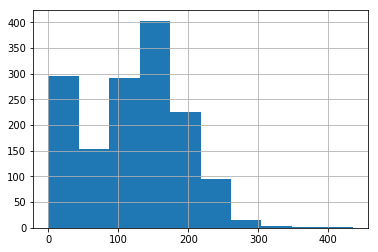

In [5]:
%matplotlib inline
X['Var16'].hist()

In [6]:
num_columns = ['Var%d' % d for d in range(1,191)]   # Nome dos atributos numéricos
cat_columns = ['Var%d' % d for d in range(191,231)] # Nome dos atributos categóricos 
X[num_columns] = X[num_columns].astype(np.float64)  # Atributos numéricos
X[cat_columns] = X[cat_columns].astype(np.str)      # Atributos categóricos

Como já mencionado, a coleção de dados consiste, então, de 230 atributos, sendo 40 categóricos e 190 numéricos, podendo conter, para algumas instâncias valores ausententes de atributos, viéses e, até mesmo, atributos completamentes ausentes em todas as instâncias. Trata-se, portanto, de uma coleção de dados esparsa, sendo necessário uso de manipulação durante o preprocessamento para adequar os dados às diferentes abordagens de classificação.

Além disso, as classes a serem preditas são também desbalanceadas, havendo uma discrepancia grande entre a quantidade de instâncias positivas da quantidade de instâncias negativas na coleção. Isso fica evidênte ao observarmos o histograma das frequências de cada uma das ações possíveis no problema, que é apresentado abaixo.

Text(0.5,0.98,'Up-selling')

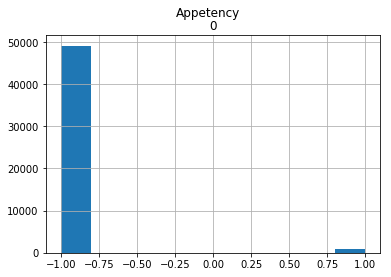

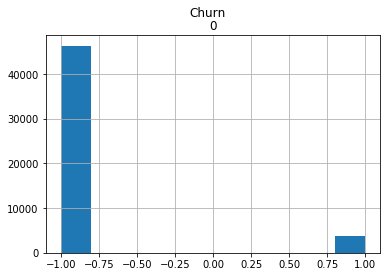

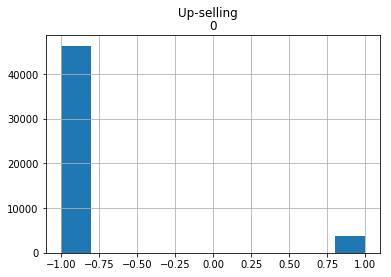

In [7]:
import pylab as pl

y_appe.hist()
pl.suptitle('Appetency')

y_churn.hist()
pl.suptitle('Churn')

y_upsell.hist()
pl.suptitle('Up-selling')

## Preprocessamento

Como visto, a coleção de dados usada está, consideravelmente, não padronizada. Nessa fase, portanto, faz-se uso de funções de transformações dos dados, adenquando-os aos classificadores usados.

### Encoder

O encoder é responsável por converter valores de atributos categóricos para o formato aceito pelos classificadores usados para essa solução: atributos numérico. Aja vista que alguns classificadores permitem predição (ou até mesmo são restritos a predição) de instâncias com atributos categóricos, vou, por questões de restrição do número de combinações, converter os atributos categóricos desta base de dados para numéricos usando LabelEncoder(), restringindo, assim, o número de algoritmos de classificação a se experimentar.

O LabelEncoder é um tipo de tranformação que se aplica sob os dados para converter as n categorias encontradas na série de instâncias em n-1 valores numéricos. Dessa forma, essa transformação mapeia cada um das N possiveis categorias (que, aqui incluem NaN como uma possibilidade) em um valor inteiro entre 0 e N-1.

Como as implementações default de Encoding consideram como argumento apenas uma serie de valores categóricos e adiante farei uso de Pipelines para otimizar a execução da solução proposta, faço uso de uma implementação de encoding que leva em consideração um DataFrame como entrada. Essa implementação facilita também o encoding de conjuntos restritos de atributos a serem codificados, podendo, por exemplo, mapear apenas um subconjunto dos atributos do DataFrame, que é exatamente o caso que estamos tratando, onde apenas os ultimos 40 atritubos são categóricos. 

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [10]:
multi_encoder = MultiColumnLabelEncoder(columns=cat_columns)

### Imputer

O imputer é outra transformação relevante para solução, uma vez que converte os valores não numéricos restantes (os NaN) em valores interpretáveis pelos classificadores usados. Esse método permite que se escolha entre diferentes estratégias de conversão para valores numéricos. Entre as possiveis abordagens de conversão têm a média, mediana e a moda dos dados.

Além disso, pode-se configurar essa estratégia para executar sob todos os atributos de uma mesma instância ou em todos os valores de um mesmo atributo na base de dados, sendo que serão considerados apenas os valores que são numéricos.

Para essa transformação, fiz a escolha de converter valores NaN pela média dos atributos numéricos da instância, uma vez que, como mencionado anteriormente, alguns atributos não possuem sequer um valor numérico (como é o exemplo do atributo Var8).

Poderia primeiramente remover esses atributos que são baseados apenas por NaNs. Contudo, de qualquer forma, imagino que a normalização pela média da instância faz mais sentido, uma vez que isso aumentaria a variância dos valores para cada um dos atributos e que, mesmo podendo ser um atributo irrelevante para a classificação, posteriormente será executada uma seleção de atributos que removerá, caso necessário, tais atributos irrelevantes para a classificação.

In [11]:
from sklearn.preprocessing import Imputer, MinMaxScaler, RobustScaler
imputer = Imputer(missing_values=np.NAN, axis=1)

### Escalares

A maioria dos algoritmos de classificação funcionam melhor se a escala dos valores numéricos for mais comportada. Ou seja, espera-se que os valores estejam com intervalos bem definidos ou com distribuição mais discrepante em relação as predições esperadas. Assim, essa tarefa visa transformar os valores numéricos com intervalos muito discriminantes em intervalos comportados, como, por exemplo, com valores entre 0 e 1.

Dessa forma, faremos uso de duas transformações sob os dados: MinMax e Robust. A primeira converte os valores dos atributos para o intervalo [0,1] dividindo os valores pelo maior valor encontrado na transformação. Obviamente valores fora desse intervalo esperado podem ser encontrados na fase de teste, assim, aplicamos a outra transformação sob os dados, que visa normalizar tais valores considerados outliers e distribuir, de maneira mais uniforme, os valores dos atributos na coleção. Outiliers são valores atipicos encontrados na coleção de dados. Esses valores podem prejudicar a predição, uma vez que podem confundir a modelagem da função objetivo, ou até mesmo, na predição das instâncias de teste.

Essa transformação em questão utiliza o IQR (ou, Interquartile Range do 1º e 3º quartil) que é uma estratégia de determinação de intervalos menos dependente de outliers, uma vez que as estratégias usuais levam em consideração a média e/ou o desvio padrão.

In [12]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
minmax_scalar = MinMaxScaler()
robust_scalar = RobustScaler()

### Validação Cruzada com Amostragem Estratificada

Um dos problemas mais tradicionais de abordagens de aprendizagem de máquina é o overfitting (ou, da terrível tradução, sobreajuste). O overfitting acontece quando o algoritmo de aprendizagem de máquina ajusta o modelo treinado, de forma tão consistente, que se mostra ineficaz na predição de instâncias não usadas na fase de treino.

RandomForest é um exemplo de abordagem que, se não manipulado com a devida cautela, pode sobreajustar aos dados, tornando-o inviável na predição de novas instâncias.

Assim, uma solução para se obter resultados mais confiáveis das predições é por meio do uso de validação cruzada para o treino e, até mesmo, avaliação de modelos. A validação cruzada consiste de dividir os dados de treino em K partes (denomiandas folds), onde serão usados K-1 partes dos dados para o treino do modelo e a parte sobressalente para o teste. O resultado final são K modelos e K resultados que descrevem, com maior confiança e menor variancia, o resultado esperado para os dados em questão.

Ademais, validação cruzada pode ser um grande problema quando não levamos em consideração o viés do valor esperado. Por exemplo, para um determinado fold, podemos ter uma quantidade muito pequena de instâncias positivas, prejudicando o treino do modelo, ou até mesmo, a avaliação adequada do resultado.

Assim, usei, para o treino e também para a avaliação, a amostragem estratificada (StratifiedKFold), que visa dividir igualmente a quantidade de instâncias poositivas entre os folds. Este algoritmo de validação cruzada tende a beneficiar também as fases de seleção de atributos e de over samplings, que serão descritas adiante.

Para garantir uma replicabilidade dos resultados, que são definidos por abordagens estatísticas, fixamos o estado inicial dos métodos que fazem uso de inicialização aleatória para 42 (que é o significado da vida, do universo e tudo mais).

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, random_state=42)

### Seleção de Atributos

Como demonstrei anteriormente, considerando os valores dos atributos para essa tarefa, é esperável que alguns atributos sejam irrelevantes para auxiliar na predição das instâncias. Esse tipo de seleção é usada tanto para otimizar a eficiência do algoritmo de machine learning, quanto para otimizar a sua acurácia.

Para tanto, escolhi o método de seleção de atributos que estima a importancia para cada atributo após o treino dos dados com classificadores fracos, sendo que o classificador "fraco" selecionado para essa tarefa é o SVC linear (Linear Support Vector Classification), que é o algoritmo de classificação que usa SVM (Support Vector Machines) com um kernel linear.

Esse classificador que é usado para predizer a importância dos atributos, estima uma linha que tenta otimizar a separação entre as instâncias positivas das negativas usando os valores do n-atributos. Assim, ele quantifica a importância de cada atributo segundo o erro que este atributo retorna considerando o valor esperado da predição. Nessas condições, quanto menor for o valor do hiper-parâmetro C (que é o hiper-parametro que restringe o erro máximo aceito para predição) menor será a quantidade de atributos que serão selecionados.

Farei um breve experimento do valor mais adequado para o hiper-parametro combinando diferentes valores de C para cada um dos classificadores experimentados. Nomeadamente, vamos experimentar usando C = [0.0001,0.0005, 0.001, 0.005, 0.01].

In [14]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
selectors = [ 
    ('lSVC_0.0001', LinearSVC(C=0.0001, penalty="l1", dual=False)),
    ('lSVC_0.0005', LinearSVC(C=0.0005, penalty="l1", dual=False)),
    ('lSVC_0.001', LinearSVC(C=0.001, penalty="l1", dual=False)),
    ('lSVC_0.005', LinearSVC(C=0.005, penalty="l1", dual=False)),
    ('lSVC_0.01', LinearSVC(C=0.01, penalty="l1", dual=False))
]

### Over Sampling

É sabido que existe discrepância entre a quantidade de classes positivas e negativas na coleção. Assim, vou usar uma técnica denominada over-sampling para igualar a quantidade de instancias de cada classe. O objetivo é dar uma clara e variável demonstração para o modelo do que seriam instâncias positivas e negativas para cada um dos problemas.

A tecnica de over-sampling que iremos aplicar é denominada SMOTE (Synthetic Minority Over-sampling Technique) e consiste de identificar grupos de instancias similares e replicar seus atributos usando um regressor fraco. Uma implementação desta técnica pode ser encontrada [aqui](http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html). Tal implementação já leva em consideração os dados em formato DataFrame, contudo é preciso usar uma versão diferente de Pipeline para que seja viável seu uso.

Assim como as outras tecnicas estatísticas, irei fixar o estado de inicialização para tornar os resultados replicáveis (e novamente será escolhido 42 como valor para tal).

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
smote = SMOTE(random_state=42)

## Classificação

Agora que a coleção de dados já foi proriamente preprocessada, partimos para a classificação das instâncias. Cada uma das 3 abordagens usadas para a tarefa carregam características peculiares. Por exemplo, o Randomforest, que é um dos estados-da-arte para diferentes soluções de classificação, classifica os dados criando um conjunto de árvores de decisão e predizendo os valores de teste com base na combinação do resultado dessas árvores.

Cada uma das árvores seleciona, aleatoriamente, uma quantidade de atributos e os ordena por aqueles que são mais discrepantes para predição na tarefa. A combinação dessas diferentes arvores que selecionam os atributos aleatoriamente tende resultar em boas predições, pois diminui a variancia final (que justificaria o overfitting) e tende a dar menos prioridade para atributos menos relevantes.

Assim como o RandomForest, o AdaBoost combina o resultado de vários classificadores em uma predição final mais otimizada. Esse tipo de abordagem, denominada ensemble, pode ser usada em diferentes contextos e, em geral, apresenta bons resultados.

Diferentemente do RandomForest, esse classificador não foca em atributos mais ou menos relevantes, mas sim em estimar vários classificadores para as instâncias mais "obvias" de se predizer. Assim, ele faz cópias desses sub-classificadores e alteram os pesos para que esses novos classificadores fiquem mais propícios às instâncias mais "dificeis" de predizer.

Em outra via, encontra-se o Multi-Label Perceptron Classifier (MLPClassifier), que é uma técnica baseada em Redes Neuronais. Redes Nuronais tem sido mais frequentemente usadas recentemente, principalmente devido às otimizações que esses algoritmos têm recebido para placas gráficas, permintido que abordagens mais sofisticadas de Redes Neuronais estimem, em tempo viável, modelos mais complexos de predição. Redes Neuronais são recorrentemente usadas como analogia para o cérebro humano, contudo, há demonstrações de que esse tipo de algoritmo de aprendizagem de máquina está mais próximo de algoritmos de otimização não-lineares (como otimização convexa) do que de uma reprensentação digital do cérebro humano.

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('RandomForest_300', RandomForestClassifier(random_state=42, n_estimators=300, max_depth=2)),
    ('MLPClassifier', MLPClassifier(alpha=1))
]

## Avaliação

Agora que todas as sub-etapas da criação dessa solução foram introduzidas, irei apresentar o processo de experimentação para a seleção do melhor modelo. Não levo em consideração abordagens paralelas e nem faço uso de funções mais escaláveis (como a GridSearchCV, que faz uma combinação todos-para-todos dos parâmetros usando validação cruzada) por didática da solução.

Assim, farei uso exclusivamente da implementação de Pipeline do pacote imbalanced-learn, variando manualmente as configurações experimentadas.

Ao final, apresento um result do AUC (Area Under Curve) do modelo, considerando a interpolação do ROC (Receiver Operating Characteristic) dos resultados esperados para o teste.

O ROC é a curva gerada pelos eixos True Positive Rate (TPR) e False Positive Rate (FPR), que nada mais são do que a porcentagem de vezes que o algoritmo identifica as instâncias como positivas quando elas são realmente positivas e a porcentagem de vezes que o algoritmo identifica as instâncias como negativas quando elas são propriamente negativas, respectivamente.

In [17]:
resultados = {}
for selector_name, selector in selectors:
    for model_name, model in classifiers:
        clf = Pipeline([
            ('label_encoder', multi_encoder),
            ('imputer', imputer),
            ('min_max_scaler', minmax_scalar),
            ('robust_scaler', robust_scalar),
            (selector_name, SelectFromModel(selector)),
            ('smote', smote),
            (model_name, model)
        ])
        resultados['%s_%s' % (selector_name, model_name)] = []
        for y_name, y in [('y_upsell',y_upsell), ('y_appe',y_appe), ('y_churn',y_churn)]:
            result = cross_val_score(clf, X, y_upsell, cv=cv.split(X, y) , scoring='roc_auc')
            resultados['%s_%s' % (selector_name, model_name)].extend(result)
            print(y_name, '%.3f' % np.mean(result), end=' ')


y_upsell 0.767 y_appe 0.772 y_churn 0.771 y_upsell 0.776 y_appe 0.784 y_churn 0.781 y_upsell 0.606 y_appe 0.597 y_churn 0.604 y_upsell 0.828 y_appe 0.829 y_churn 0.829 y_upsell 0.833 y_appe 0.840 y_churn 0.844 y_upsell 0.707 y_appe 0.666 y_churn 0.677 y_upsell 0.834 y_appe 0.835 y_churn 0.835 y_upsell 0.843 y_appe 0.842 y_churn 0.834 y_upsell 0.706 y_appe 0.709 y_churn 0.698 y_upsell 0.835 y_appe 0.836 y_churn 0.839 y_upsell 0.842 y_appe 0.841 y_churn 0.840 y_upsell 0.703 y_appe 0.703 y_churn 0.691 y_upsell 0.834 y_appe 0.831 y_churn 0.837 y_upsell 0.839 y_appe 0.837 y_churn 0.838 y_upsell 0.708 y_appe 0.705 y_churn 0.687 

Assim, o modelo ideal para essa coleção de dados (considerando que a combinação de experimentos realizada foi estritamente limitada) é, na ordem:

In [19]:
for config, results in sorted(resultados.items(), key=lambda x: np.mean(x[1]), reverse=True):
    print(config, np.mean(results))

lSVC_0.005_RandomForest_300 0.8408107898866561
lSVC_0.001_RandomForest_300 0.8396373569815203
lSVC_0.0005_RandomForest_300 0.838726937574723
lSVC_0.01_RandomForest_300 0.8379140632899508
lSVC_0.005_AdaBoostClassifier 0.8365783129667278
lSVC_0.001_AdaBoostClassifier 0.834543219073298
lSVC_0.01_AdaBoostClassifier 0.8341265030093582
lSVC_0.0005_AdaBoostClassifier 0.8288009105657945
lSVC_0.0001_RandomForest_300 0.7805875325315382
lSVC_0.0001_AdaBoostClassifier 0.7701211017822427
lSVC_0.001_MLPClassifier 0.7045716626251111
lSVC_0.01_MLPClassifier 0.6998791857638419
lSVC_0.005_MLPClassifier 0.6991275649053992
lSVC_0.0005_MLPClassifier 0.6835930391700441
lSVC_0.0001_MLPClassifier 0.6022101025637225


Dessa forma, o resultado obtido pelo modelo apresentado aqui (0.8408) está relativamente próximo do melhor resultado para essa tarefa (IBM Research: 0.8493). Tais resultados do KDD Cup 2009 podem ser encontrados [aqui](http://www.vincentlemaire-labs.fr/kddcup2009/).